<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 4: *Classification And Regression Tree (CART)***

###**Tenggat Waktu: 2 Maret 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 2 Maret 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.

In [16]:
# Isi dengan data diri Anda
NAMA = "Yoshelin Yamala Vijnana"
KELAS = "C"
NPM = "2206826702"
USERNAME_KAGGLE = "yoshelin.yamala"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["ChatGPT, Google, Bing"]

In [17]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Yoshelin Yamala Vijnana dari kelas C dengan NPM 2206826702, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Yoshelin Yamala Vijnana)


## Deskripsi Dataset

Lab ini akan menggunakan 2 dataset, yakni dataset untuk klasifikasi dan dataset untuk regresi.

Dataset yang digunakan untuk klasifikasi adalah dataset **Weather Type** (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/data) dengan modifikasi.

Dataset yang akan digunakan untuk regresi adalah dataset **Pokemon** (https://www.kaggle.com/datasets/terminus7/pokemon-challenge/data) dengan modifikasi.

### Deskripsi Dataset Klasifikasi

Kumpulan data ini dibuat secara sintetis untuk meniru data cuaca untuk tugas klasifikasi. Kumpulan data ini mencakup berbagai fitur terkait cuaca dan mengkategorikan cuaca menjadi empat jenis:  Rainy, Sunny, Cloudy, and Snowy. Berikut adalah atribut-atribut data:

- Temperature (numeric): Suhu dalam derajat Celsius, mencakup kondisi dari sangat dingin hingga sangat panas.
- Humidity (numeric): Persentase kelembaban, termasuk nilai di atas 100% untuk memperkenalkan pencilan.
- Wind Speed (numeric): Kecepatan angin dalam kilometer per jam, dengan rentang yang mencakup nilai yang tidak realistis.
- Precipitation (%) (numeric): Persentase presipitasi, termasuk nilai pencilan.
- Cloud Cover (categorical): Deskripsi tentang tingkat tutupan awan.
Atmospheric Pressure (numeric): Tekanan atmosfer dalam hPa, mencakup rentang yang luas.
- UV Index (numeric): Indeks UV, menunjukkan kekuatan radiasi ultraviolet.
- Season (categorical): Musim saat data direkam.
- Visibility (km) (numeric): Jarak pandang dalam kilometer, termasuk nilai yang sangat rendah atau sangat tinggi.
- Location (categorical): Jenis lokasi tempat data direkam.
- Weather Type (categorical): Variabel target untuk klasifikasi, menunjukkan jenis cuaca.

### Deskripsi Dataset Regresi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap besarnya persentase kemenangan (WinningPercentage) dari Pokemon. Berikut adalah atribut-atribut data:

- ID (numeric): ID Pokemon.
- Name (categorical): Nama Pokemon.
- Type 1 (cateorical): Tipe serangan 1 Pokemon.
- Type 2 (categorical): Tipe serangan 2 Pokemon.
- HP (numeric): Jumlah darah Pokemon.
- Attack (numeric): Jumlah kekuatan serangan Pokemon.
- Defense (numeric): Jumlah daya tahan Pokemon.
- Sp. Atk (numeric): Kecepatan serangan Pokemon.
- Sp. Def (numeric): Kecepatan bertahan Pokemon.
- Generation (numeric): Generasi Pokemon.
- Legendary (cateorical): Apakah Pokemon Legendary/bukan.
- WinningPercentage (numeric): Variabel target untuk regresi, menunjukkan persentase kemenangan pokemon.

## Import Libraries

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read Datasets

**Bacalah konten dari masing-masing dataset yang telah disediakan. Perhatikan tipe data dari masing-masing kolom, apakah sudah cocok untuk dijadikan input ke dalam model atau tidak.**

### Dataset Weather Type

**Terapkan proses Read Dataset di bawah cell ini**

In [19]:
df_weather = pd.read_csv("weather_classification_dataset.csv")
df_weather.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-10.0,90,8.0,62.0,overcast,993.68,1,Winter,2.0,mountain,Snowy
1,-2.0,82,5.0,92.0,overcast,981.80,1,Winter,1.5,inland,Snowy
2,29.0,33,4.5,4.0,clear,1012.76,8,Spring,10.0,coastal,Sunny
3,24.0,91,15.5,89.0,overcast,991.10,0,Winter,1.5,inland,Rainy
4,20.0,85,8.5,81.0,overcast,1014.67,3,Winter,1.0,coastal,Rainy


### Dataset Pokemon

**Terapkan proses Read Dataset di bawah cell ini**

In [20]:
# CODE HERE

df_pokemon = pd.read_csv("pokemon_dataset.csv")
df_pokemon.head(5)

,ID,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,WinningPercentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,27.819549
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,38.016529
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,67.424242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,56.000000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,49.107143


## SOAL 1 Data Pre-processing [20]

Terapkanlah data pre-processing pada bagian ini agar dataset yang telah diberikan dapat dijadikan input dari model yang akan kalian buat. Terapkan proses tersebut untuk masing-masing dataset (Weather Type & Pokemon) hingga dataset terbagi menjadi train dan test


**Note: Gunakan Random Seed 42 saat melakukan train-test split !**

### Dataset Weather Type

**Terapkan proses data pre-processing di bawah cell ini**

In [21]:
# CODE HERE

# Load dataset
df_weather = pd.read_csv("weather_classification_dataset.csv")

# One-hot encoding untuk kolom kategorikal cloud cover, season, dan location
df_weather = pd.get_dummies(df_weather, columns=['Cloud Cover', 'Season', 'Location'], drop_first=True)
X_weather = df_weather.drop(columns=['Weather Type'])
y_weather = df_weather['Weather Type']

# Kemudian split dataset menjadi train dan test
X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(
    X_weather, y_weather, test_size=0.2, random_state=42
)


### Dataset Pokemon

**Terapkan proses data pre-processing di bawah cell ini**

In [22]:
# CODE HERE
# Load dataset
df_pokemon = pd.read_csv("pokemon_dataset.csv")

# Mengisi missing values dan encode kategori type 1 & type 2
df_pokemon['Type 2'] = df_pokemon['Type 2'].fillna('None')
df_pokemon = pd.get_dummies(df_pokemon, columns=['Type 1', 'Type 2'], drop_first=True)

# Menghapus kolom ID, Nama (tidak relevan)
df_pokemon = df_pokemon.drop(columns=['ID', 'Name'])


X_pokemon = df_pokemon.drop(columns=['WinningPercentage'])
y_pokemon = df_pokemon['WinningPercentage']
X_train_pokemon, X_test_pokemon, y_train_pokemon, y_test_pokemon = train_test_split( #Split dataset
    X_pokemon, y_pokemon, test_size=0.2, random_state=42
)

## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree merupakan model yang beroperasi dengan struktur berbentuk Binary Tree, di mana setiap node hanya dapat memiliki dua child node paling banyak. Dalam bidang data science, model ini diterapkan dalam konteks Supervised Learning, yaitu model dibentuk berdasarkan data training dan selanjutnya digunakan untuk membuat prediksi terhadap data yang disajikan. Data training yang digunakan akan diolah menjadi sebuah rangkaian aturan dalam bentuk Binary Tree. Aturan-aturan ini selanjutnya digunakan untuk proses prediksi pada dataset lain.

#### Training

Function di bawah ini merupakan function yang dapat digunakan untuk menghitung metrics hasil testing, baik untuk kasus regresi, maupun kasus klasifikasi.

In [23]:
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [24]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))


##### Dataset Weather Type

In [25]:
# Melakukan training pada model decision tree
dtc_weather = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc_weather.fit(X_train_weather, y_train_weather)

DecisionTreeClassifier(max_depth=3, random_state=42)

##### Dataset Pokemon

In [26]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtr_pokemon = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_pokemon.fit(X_train_pokemon, y_train_pokemon)

DecisionTreeRegressor(max_depth=3, random_state=42)

#### Evaluation

##### Dataset Weather Type

In [27]:
# Memprediksi data testing
prediction = dtc_weather.predict(X_test_weather)
classification_metrics(prediction, y_test_weather)

Accuracy: 0.85
F1 Score: 0.8497854708673718
Recall Score: 0.847529781523684
Precision Score: 0.8561335403726709


##### Dataset Pokemon

In [28]:
# Memprediksi data testing
prediction = dtr_pokemon.predict(X_test_pokemon)
regression_metrics(prediction, y_test_pokemon)

MAE: 6.009400921142778
MSE: 63.59326271237371
RMSE: 7.974538401210048
R_squared: 0.9026491298127916


#### Hyperparameter


Hyperparameter adalah parameter yang dapat kita sesuaikan atau konfigurasi sebelum memulai proses pembangunan model. Tujuan dari penyesuaian ini adalah untuk mengoptimalisasi performa model sehingga diharapkan dapat berfungsi lebih efektif.

> Ada beberapa jenis hyperparameter yang terdapat dalam beragam algoritma machine learning, termasuk dalam algoritma Decision Tree. Beberapa hyperparameter yang ada dalam algoritma Decision Tree yang disediakan oleh modul sklearn.tree antara lain:

- `criterion`: Metrik yang digunakan untuk mengevaluasi kualitas pemisahan node, contohnya:
  - `squared_error`: menggunakan reduksi varians sebagai kriteria seleksi fitur dan meminimalkan kerugian L2 dengan menggunakan mean dari setiap node terminal
  - `friedman_mse`: menghitung mean squared error dengan Friedman's improvement score untuk kemungkinan pemisahan (tidak perlu khawatir, ini tidak akan keluar di ujian)
  - `absolute_error`: meminimalkan kerugian L1 dengan menggunakan median dari setiap node terminal
  - `poisson`: memanfaatkan reduksi dalam Poisson deviance untuk menentukan pemisahan
- `max_depth`: Membatasi kedalaman maksimum dari pohon
- `min_samples_split`: Menentukan jumlah minimum sampel yang dibutuhkan untuk memecah sebuah node internal
Untuk informasi lebih detail, Anda bisa merujuk pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [29]:
# Melakukan training pada model decision tree dengan hyperparameter max_depth=6
dtr_md6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr_md6.fit(X_train_pokemon, y_train_pokemon)

# Memprediksi data testing dan melakukan evaluasi
predicted6 = dtr_md6.predict(X_test_pokemon)
regression_metrics(predicted6, y_test_pokemon)

MAE: 4.7623921439107475
MSE: 47.09966412227484
RMSE: 6.8629195042834965
R_squared: 0.9278981280050516


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Terlihat bahwa MAE, MSE, RMSE, dan R_squared model Decision Tree dengan `max_depth = 3` berbeda dengan `max_depth = 6`.

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan



Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib` atau menggunakan `sklearn.tree.export_text`.

Berikut adalah contoh visualisasi decision tree pada dataset Pokemon tanpa max depth:

In [30]:
# Membangun model tree dan visualisasinya
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_pokemon, y_train_pokemon)
print(tree.export_text(tree_model, feature_names=pd.Series(X_train_pokemon.columns).array))

|--- Speed <= 66.50
|   |--- Speed <= 48.50
|   |   |--- Attack <= 84.00
|   |   |   |--- Speed <= 37.00
|   |   |   |   |--- Attack <= 49.00
|   |   |   |   |   |--- Speed <= 29.50
|   |   |   |   |   |   |--- Defense <= 68.50
|   |   |   |   |   |   |   |--- Generation <= 1.50
|   |   |   |   |   |   |   |   |--- value: [11.54]
|   |   |   |   |   |   |   |--- Generation >  1.50
|   |   |   |   |   |   |   |   |--- Attack <= 27.50
|   |   |   |   |   |   |   |   |   |--- Sp. Def <= 44.50
|   |   |   |   |   |   |   |   |   |   |--- Sp. Def <= 35.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [7.52]
|   |   |   |   |   |   |   |   |   |   |--- Sp. Def >  35.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Sp. Def >  44.50
|   |   |   |   |   |   |   |   |   |   |--- Sp. Atk <= 34.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [4.62]
|   |   |   |   |   |   |   |   |   |   |--- Sp. Atk >  34

Secara visual:

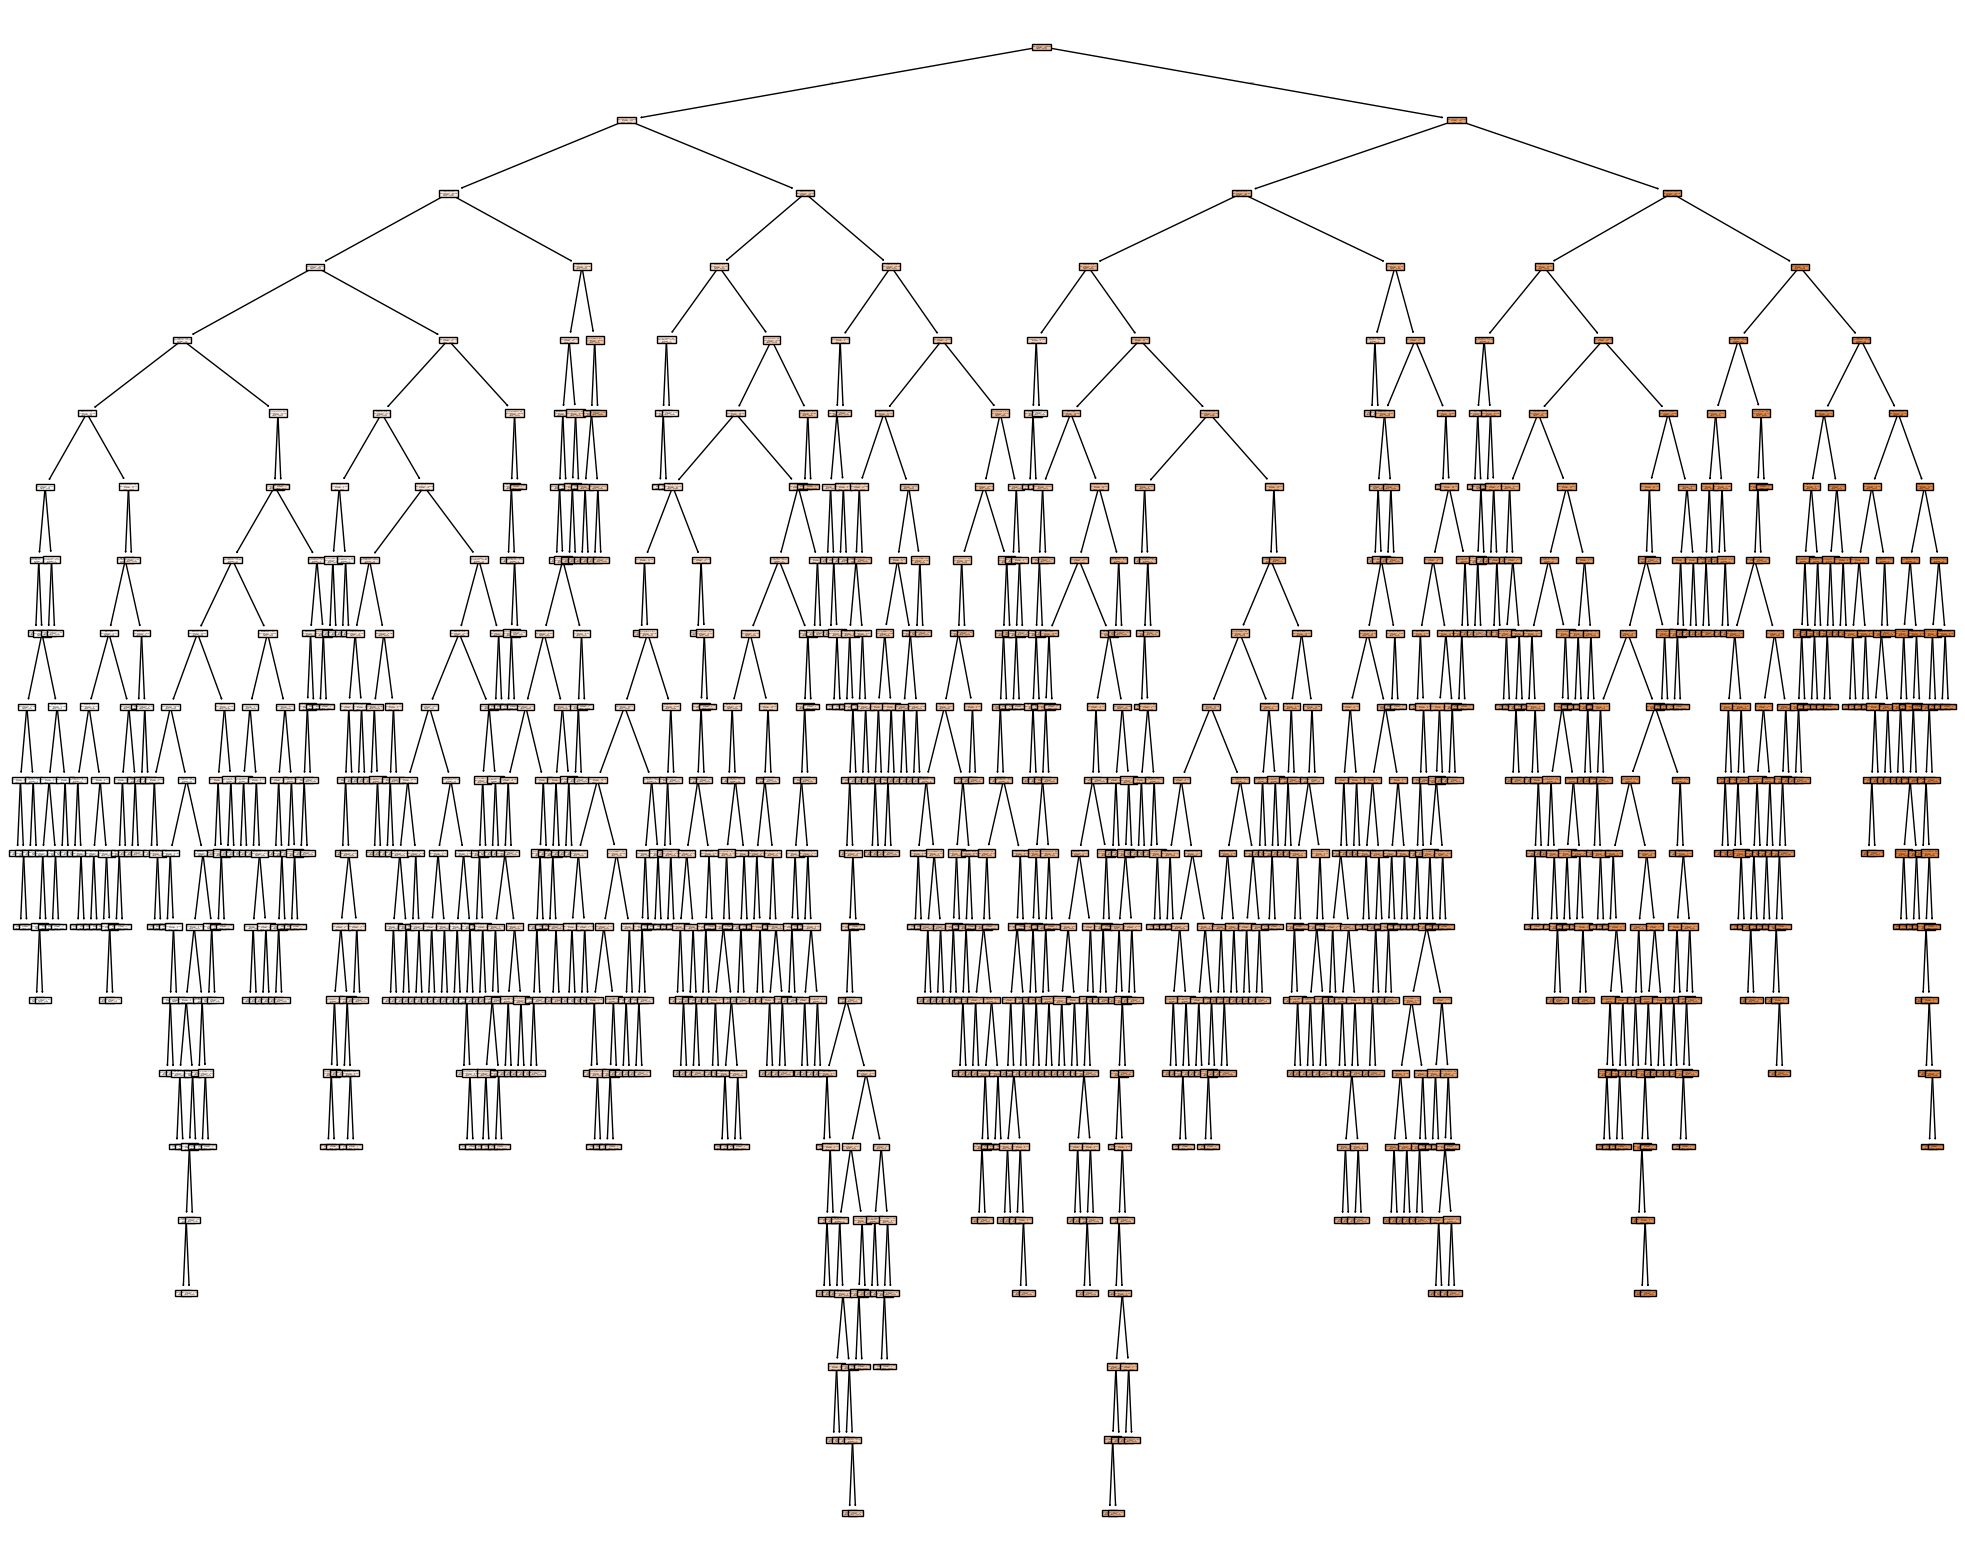

In [31]:
from sklearn.tree import plot_tree

features = list(X_train_pokemon.columns)

labels = [str(label) for label in y_train_pokemon.unique()]

fig = plt.figure(figsize=(25, 20))
_ = plot_tree(tree_model, feature_names=features, class_names=labels, filled=True)
plt.show()

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [32]:
# Membangun model tree dan visualisasi
dt_md4 = DecisionTreeRegressor(max_depth=4)
dt_md4.fit(X_train_pokemon, y_train_pokemon)
print(tree.export_text(dt_md4, feature_names=pd.Series(X_train_pokemon.columns).array))

|--- Speed <= 66.50
|   |--- Speed <= 48.50
|   |   |--- Attack <= 84.00
|   |   |   |--- Speed <= 37.00
|   |   |   |   |--- value: [13.59]
|   |   |   |--- Speed >  37.00
|   |   |   |   |--- value: [22.68]
|   |   |--- Attack >  84.00
|   |   |   |--- Attack <= 127.50
|   |   |   |   |--- value: [28.63]
|   |   |   |--- Attack >  127.50
|   |   |   |   |--- value: [46.14]
|   |--- Speed >  48.50
|   |   |--- Speed <= 57.50
|   |   |   |--- Attack <= 25.00
|   |   |   |   |--- value: [20.71]
|   |   |   |--- Attack >  25.00
|   |   |   |   |--- value: [34.15]
|   |   |--- Speed >  57.50
|   |   |   |--- Attack <= 40.50
|   |   |   |   |--- value: [34.85]
|   |   |   |--- Attack >  40.50
|   |   |   |   |--- value: [45.72]
|--- Speed >  66.50
|   |--- Speed <= 90.50
|   |   |--- Speed <= 80.50
|   |   |   |--- Attack <= 32.50
|   |   |   |   |--- value: [32.66]
|   |   |   |--- Attack >  32.50
|   |   |   |   |--- value: [57.37]
|   |   |--- Speed >  80.50
|   |   |   |--- Attack <= 3

Secara visual:

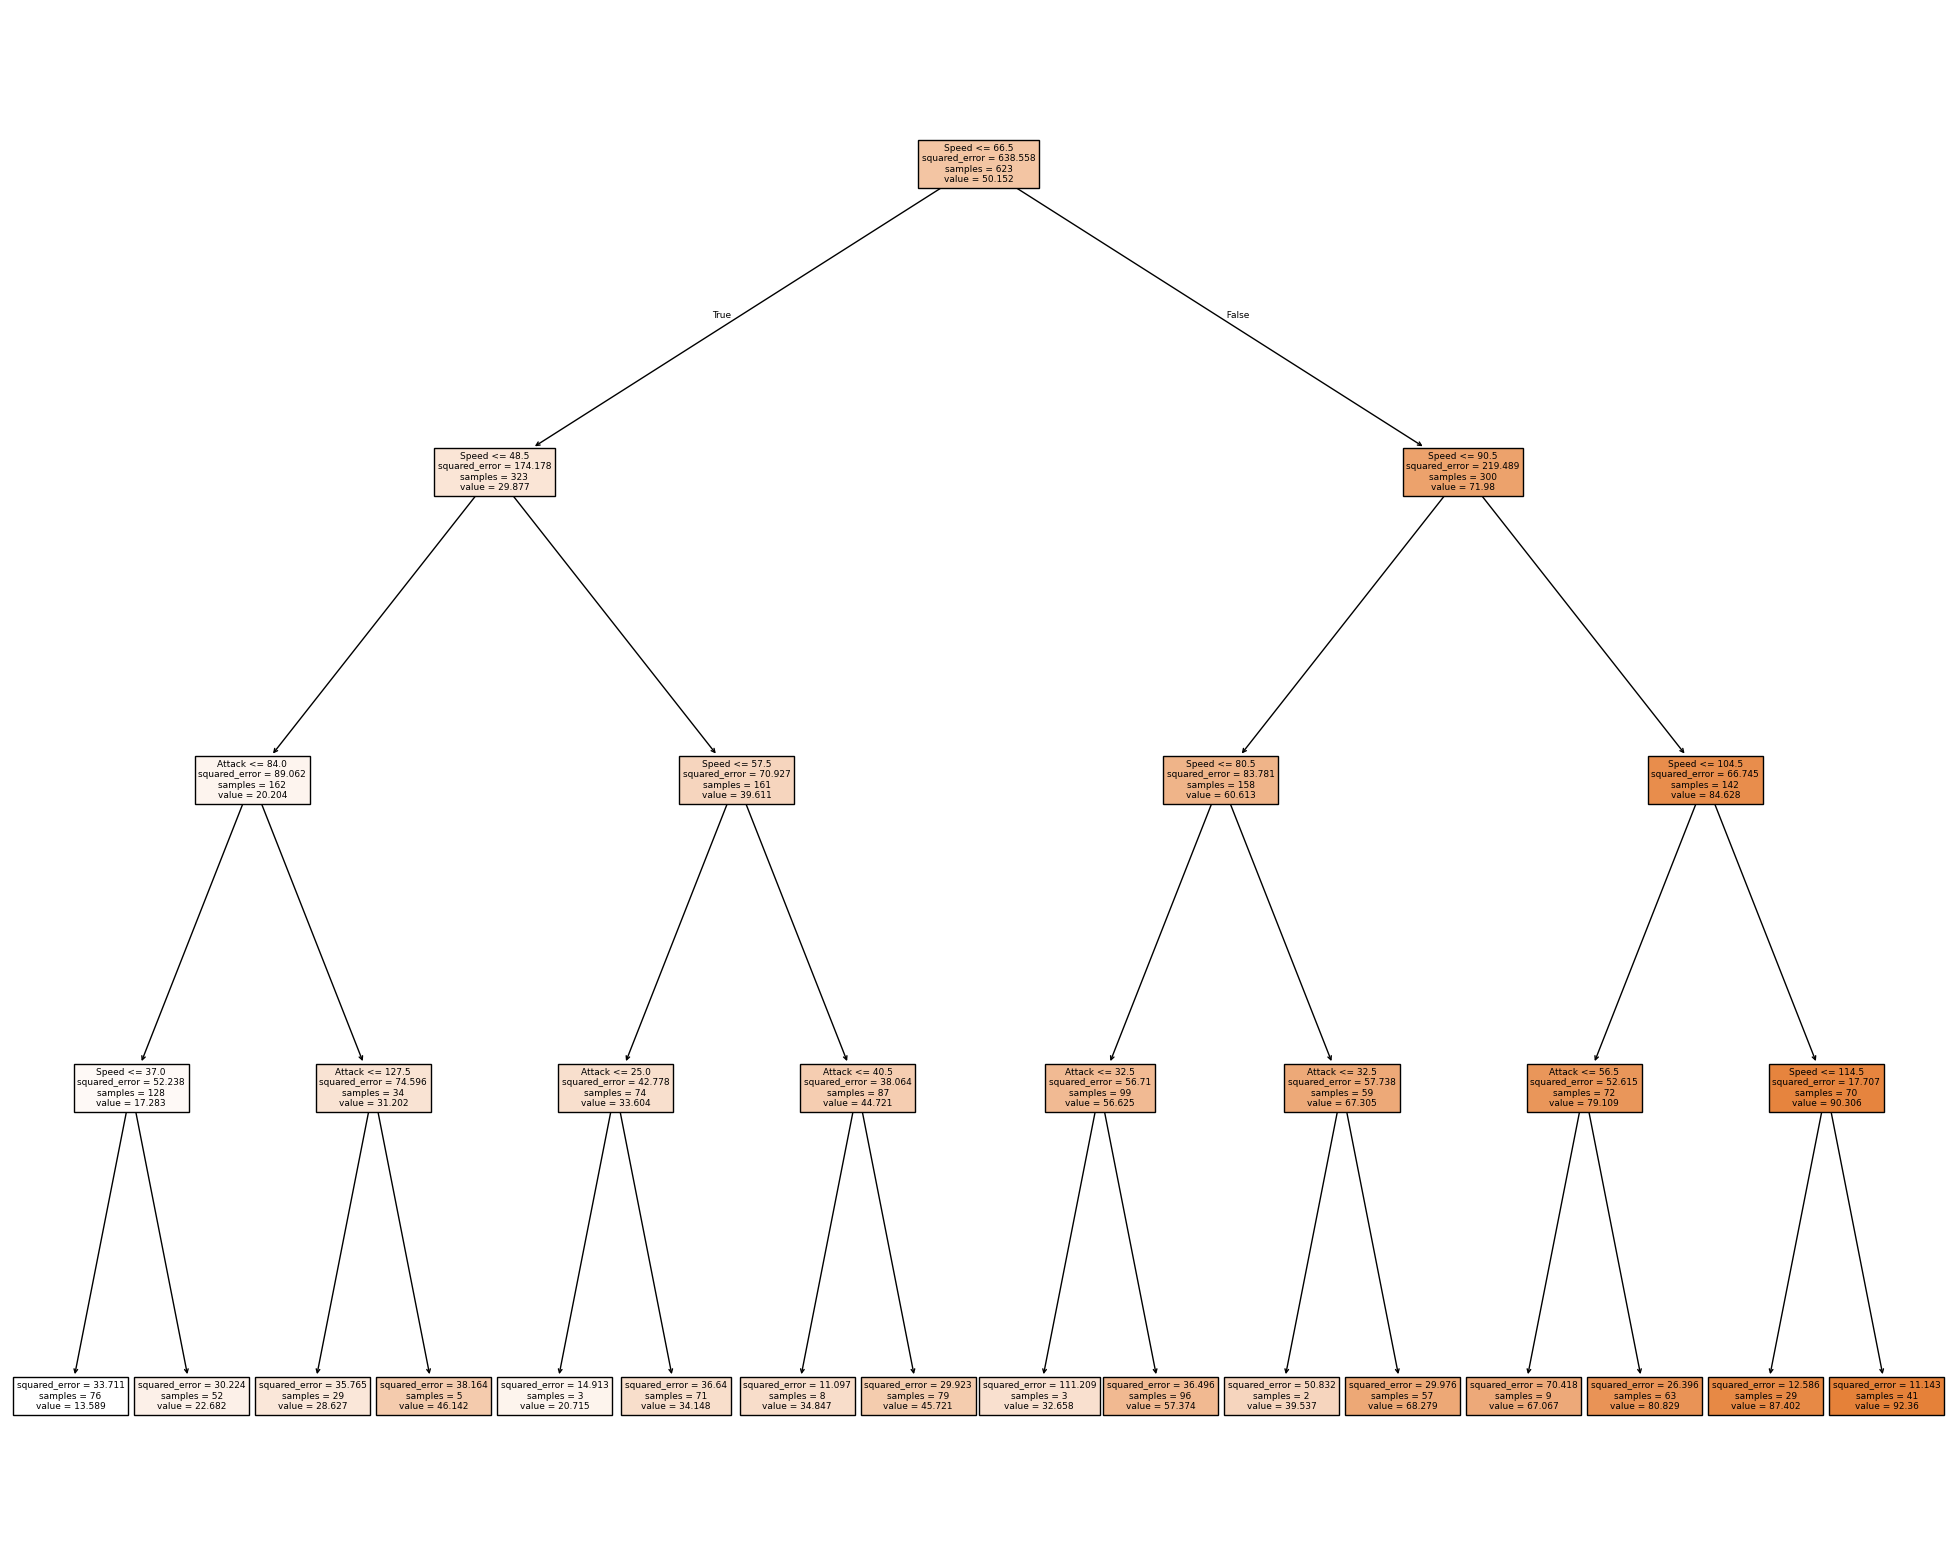

In [33]:
features = list(X_train_pokemon.columns)

labels = [str(label) for label in y_train_pokemon.unique()]

fig = plt.figure(figsize=(25, 20))
_ = plot_tree(dt_md4, feature_names=features, class_names=labels, filled=True)
plt.show()

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan Hyperparameter tidak dilakukan oleh model tapi dilakukan oleh Programmer. Ini biasa dibantu oleh tools untuk mencari Hyperparameter terbaik secara iteratif. Proses ini disebut **Hyperparameter Tuning**. Pada Sklearn, ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Metode ini akan dibahas lebih lanjut dibawah.

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*).

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

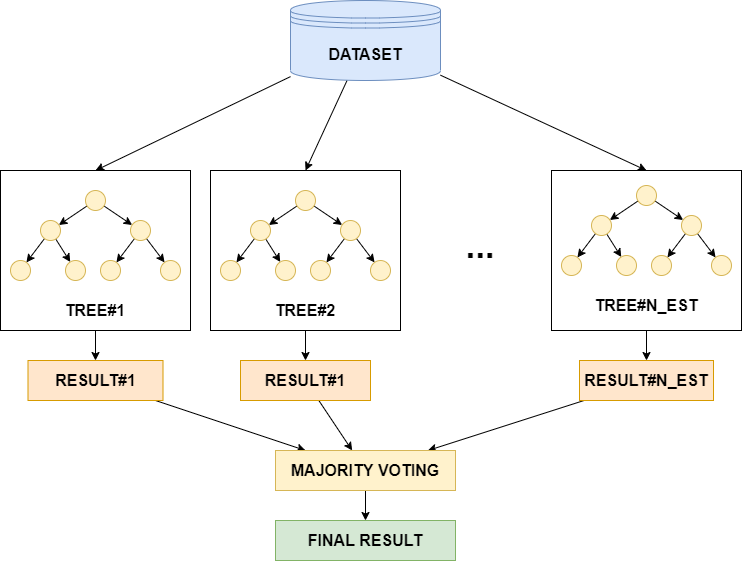

Sumber: Lab 4 KASDD Gasal 2023

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [34]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train_pokemon, y_train_pokemon)

# Memprediksi data testing dan menampilkan metrics nya
predicted = rf_md.predict(X_test_pokemon)
regression_metrics(predicted, y_test_pokemon)

MAE: 4.157439088633084
MSE: 38.71454562382729
RMSE: 6.222101383280997
R_squared: 0.9407343711482721


In [35]:
# Melakukan training pada model random forest
rf_weather_paramless = RandomForestClassifier()
rf_weather_paramless.fit(X_train_weather, y_train_weather)
predicted = rf_weather_paramless.predict(X_test_weather)

# Menampilkan metrics
classification_metrics(predicted, y_test_weather)

Accuracy: 0.88125
F1 Score: 0.8802482836200399
Recall Score: 0.8800024327463352
Precision Score: 0.8806378242353852


Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [36]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50, 100],
               'max_depth' : [None, 5, 10, 12]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(X_train_pokemon, y_train_pokemon)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [None, 5, 10, 12],
                         'min_samples_split': [10, 20, 50, 100]})

In [37]:
clf.best_params_

{'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_split': 20}

In [38]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(X_train_pokemon, y_train_pokemon)
predicted = best_hp.predict(X_test_pokemon)
regression_metrics(predicted, y_test_pokemon)

MAE: 4.939478910125195
MSE: 55.22547491739411
RMSE: 7.431384454958182
R_squared: 0.9154588424873492


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba pada `param_grid`.

# Latihan Soal

## SOAL 2 [15]

### SOAL 2a
[2.5] Bangun dan latih 2 model decision tree (decision tree regressor untuk Pokemon dan decision tree classifier untuk Weather Type) dengan memberikan nilai pada *hyperparameter*:
- `max_depth = 4`
- `random_state = 2025`.

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtc_weather_md4 = DecisionTreeClassifier(max_depth=4, random_state=2023)
dtc_weather_md4.fit(X_train_weather, y_train_weather)
dtc_weather_md4 # Output model


DecisionTreeClassifier(max_depth=4, random_state=2023)

In [40]:
dtr_pokemon_md4 = DecisionTreeRegressor(max_depth=4, random_state=2023)
dtr_pokemon_md4.fit(X_train_pokemon, y_train_pokemon)
dtr_pokemon_md4 # Output model


DecisionTreeRegressor(max_depth=4, random_state=2023)

### SOAL 2b
[2.5]  Visualisasikan 2 model decision tree (decision tree regressor untuk Pokemon dan decision tree classifier untuk Weather Type) yang didapat pada soal 2a dengan menggunakan plot_tree()!

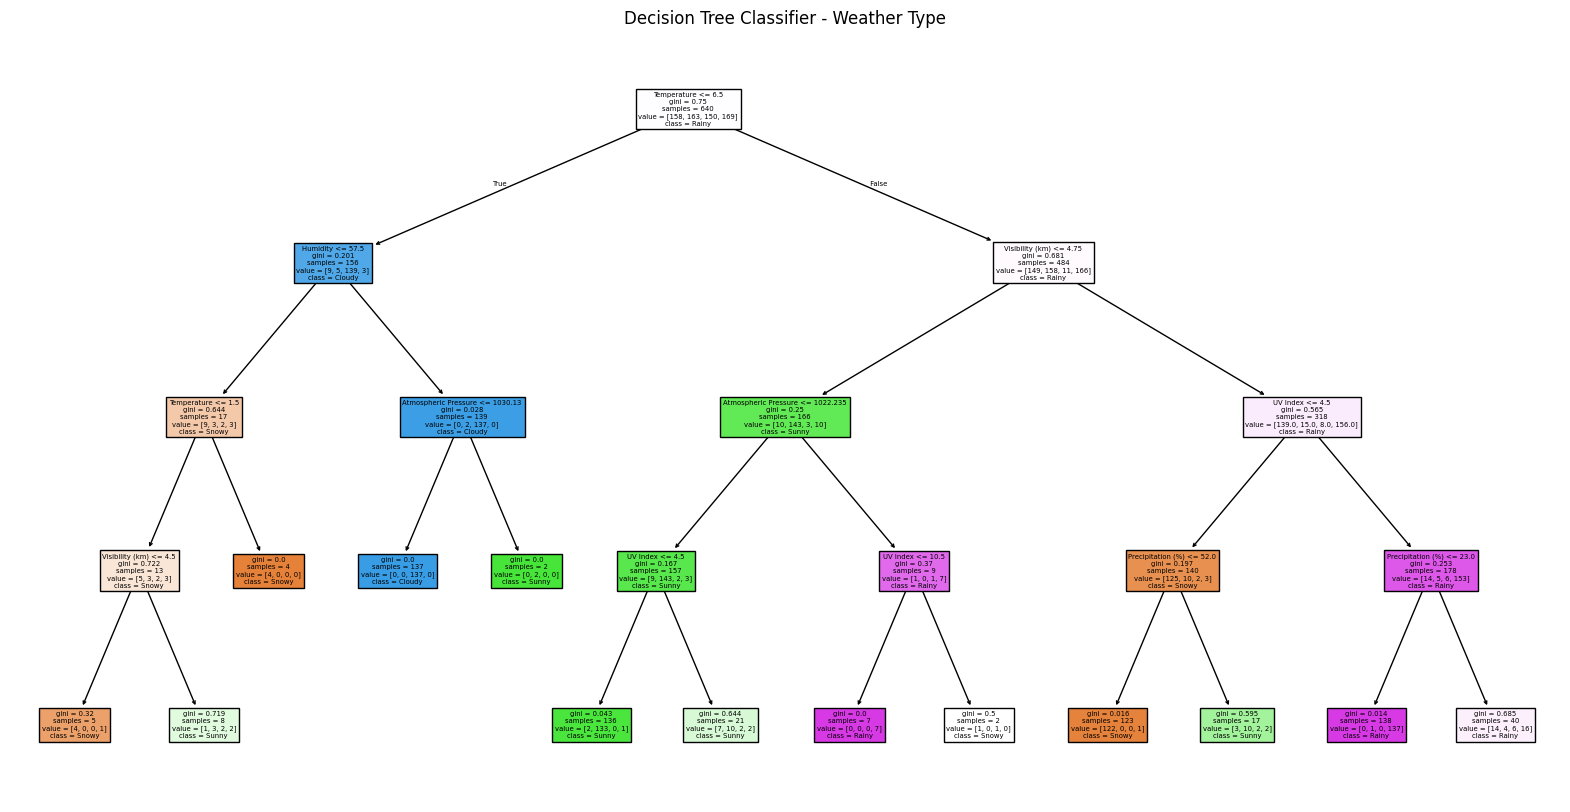

In [41]:
plt.figure(figsize=(20,10))
plot_tree(dtc_weather_md4, feature_names=X_train_weather.columns, class_names=y_train_weather.unique(), filled=True)
plt.title("Decision Tree Classifier - Weather Type")
plt.show()

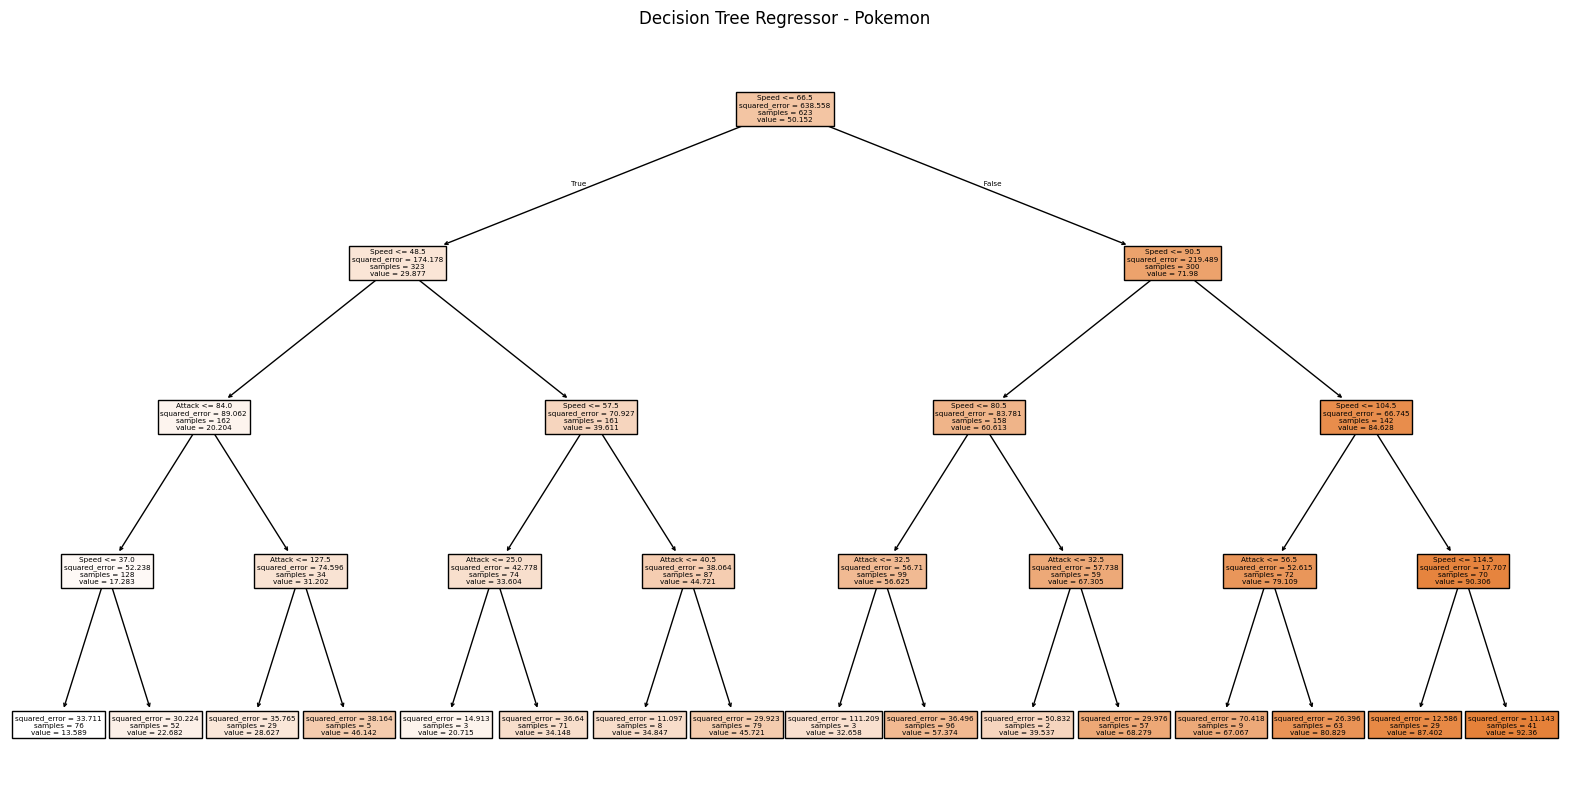

In [42]:
plt.figure(figsize=(20,10))
plot_tree(dtr_pokemon_md4, feature_names=X_train_pokemon.columns, filled=True)
plt.title("Decision Tree Regressor - Pokemon")
plt.show()

### SOAL 2c

[2.5]  Pada model decision tree regressor, diberikan data aktual WinningPercentage 33%. Tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error WinningPercentage dari hasil prediksi dengan data aktual?    

**Catatan:** Jelaskan bagian ini tanpa kode

**Jawaban:**

Atribut yang paling berpengaruh dalam memprediksi WinningPercentage mendekati 33% berdasarkan decision tree regressor adalah Speed, Attack, Defense, dan Sp. Atk, karena atribut-atribut ini sering menjadi faktor utama pemisahan node. Dari hasil prediksi model, jika Pokémon memiliki Speed = 55, maka akan menghasilkan WinningPercentage sekitar 34.15%, yang cukup dekat dengan 33%. Dengan demikian, Mean Absolute Error (MAE) antara prediksi dan data aktual adalah 1.15. Nilai ini menunjukkan bahwa model memiliki akurasi yang cukup baik dalam memprediksi WinningPercentage untuk kondisi tersebut.

### SOAL 2d

[2.5]  Untuk decision tree classifier, tentukan atribut-atribut dari suatu Weather Type yang paling berpotensi untuk dikategorikan sebagai kelas Sunny. Jika terdapat berbagai kemungkinan pasangan atribut yang paling berpotensi, cantumkanlah semua kemungkinan pasangan atribut tersebut.

**Catatan:** Jelaskan bagian ini tanpa kode

**Jawaban:**

Klasifikasi cuaca sunny dalam decision tree classifier kemungkinan besar dipengaruhi oleh temperature, cloud cover, humidity, dan UV index. Suhu yang lebih tinggi biasanya berkaitan dengan cuaca cerah, terutama jika cloud cover sedang rendah atau clear, karena sedikitnya awan memungkinkan lebih banyak sinar matahari. UV index yang tinggi juga menjadi indikator utama, karena radiasi UV meningkat saat cuaca cerah. Selain itu, humidity yang rendah/ sedang lebih memungkinkan kondisi cerah, karena kelembaban tinggi biasanya dikaitkan dengan hujan atau kabut. Jika model memiliki lebih dari satu kombinasi atribut yang dapat menghasilkan klasifikasi sunny, maka kombinasi tersebut dapat berupa emperature tinggi + cloud cover rendah + UV index tinggi atau temperature sedang + cloud Cover rendah + humidity rendah. Faktor-faktor ini bersama-sama membentuk pola dalam decision tree yang menentukan apakah suatu kondisi cuaca diklasifikasikan sebagai sunny

### SOAL 2e

[2.5]  Untuk decision tree regressor, jika terdapat data pokemon dengan speed = 55, tentukan range kemungkinan WinningPercentage yang diprediksi oleh model pada data tersebut.

**Catatan:** Jelaskan bagian ini tanpa kode

**Jawaban:**

Dengan speed = 55, model decision tree regressor akan menggunakan aturan dalam decision tree untuk menentukan kemungkinan rentang WinningPercentage. Model akan melihat threshold speed yang telah dipelajari dan membandingkannya dengan atribut lain yang berkontribusi seperti Attack/ Defense. Berdasarkan struktur decision tree, rentang prediksi WinningPercentage bisa berada dalam kategori menengah, misalnya sekitar 40% - 60%, tergantung pada node mana yang dilalui dalam pohon keputusan.

### SOAL 2f

[2.5]  Untuk decision tree classifier, jika terdapat data dengan diketahui Temprature = 9, Visibility (km) = 4, dan Atmospheric Pressure = 1030, tentukan kemungkinan kelas yang akan diprediksi model pada data tersebut. Jika terdapat berbagai kelas, cantumkanlah semua kemungkinan kelas tersebut.

**Catatan:** Jelaskan bagian ini tanpa kode

**Jawaban:**

Jika temperature = 9, visibility = 4 km, dan atmospheric pressure = 1030, maka selanjutnya decision tree classifier akan memeriksa aturan dalam model untuk mengklasifikasikan weather type. Tekanan atmosfer yang tinggi dan suhu rendah sering dikaitkan dengan cloudy/ snowy, terutama jika humidity juga tinggi. Namun, jika atribut lain seperti wind speed atau precipitation (%) rendah, kemungkinan klasifikasi bisa menjadi Cloudy/ clear. Model akan mengikuti jalur dalam pohon keputusan hingga mencapai node leaf yang memberikan kelas prediksi paling mungkin.

## SOAL 3 [10]

### SOAL 3a

[5] Implementasikan 2 model Random Forest (Random Forest Regressor untuk Pokemon dan Random Forest Classifier untuk Weather Type) Implementasi pada soal ini akan menggunakan nilai *hyperparameter*
- `max_depth = 4`
- `random_state = 2025`

In [43]:
# Load dataset Pokemon
df_pokemon = pd.read_csv("pokemon_dataset.csv")

# Preprocessing dataset Pokemon
df_pokemon['Type 2'] = df_pokemon['Type 2'].fillna('None')
df_pokemon = pd.get_dummies(df_pokemon, columns=['Type 1', 'Type 2'], drop_first=True)
df_pokemon = df_pokemon.drop(columns=['ID', 'Name'])

X_pokemon = df_pokemon.drop(columns=['WinningPercentage'])
y_pokemon = df_pokemon['WinningPercentage']
X_train_pokemon, X_test_pokemon, y_train_pokemon, y_test_pokemon = train_test_split( # Split dataset
    X_pokemon, y_pokemon, test_size=0.2, random_state=42
)

# Membuat dan train model 
rf_regressor = RandomForestRegressor(max_depth=4, random_state=2025)
rf_regressor.fit(X_train_pokemon, y_train_pokemon)
rf_regressor # Output model


RandomForestRegressor(max_depth=4, random_state=2025)

In [44]:
# Load dataset
df_weather = pd.read_csv("weather_classification_dataset.csv") 
df_weather = pd.get_dummies(df_weather, columns=['Cloud Cover', 'Season', 'Location'], drop_first=True) # Preprocessing dataset Weather
X_weather = df_weather.drop(columns=['Weather Type'])
y_weather = df_weather['Weather Type']

X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split( # Split dataset
    X_weather, y_weather, test_size=0.2, random_state=42
)

# Membuat dan train model
rf_classifier = RandomForestClassifier(max_depth=4, random_state=2025)
rf_classifier.fit(X_train_weather, y_train_weather)
rf_classifier # Output model


RandomForestClassifier(max_depth=4, random_state=2025)

### SOAL 3b

[2.5] Model Random Forest dianggap kurang dapat diinterpretasikan dibandingkan dengan Decision Tree. Apakah penyebab dari hasil tersebut?

**Jawaban:**

Random forest kurang dapat diinterpretasikan dibandingkan dengan decision tree karena terdiri dari banyak decision tree yang bekerja secara ensemble, sehingga sulit untuk memahami bagaimana setiap keputusan dibuat secara individu. Berbeda dengan decision tree yang memiliki struktur pohon yang jelas dan mudah diikuti, random forest menggabungkan prediksi dari banyak pohon menggunakan voting atau averaging, yang membuatnya lebih seperti "black box". Selain itu, karena setiap pohon dalam random forest dilatih pada subset data yang berbeda dengan fitur yang dipilih secara acak, maka sulit untuk melacak aturan spesifik yang digunakan untuk membuat keputusan akhir. Sehingga hal ini menyebabkan random forest lebih kuat dalam generalisasi tetapi kurang dapat diinterpretasikan dibandingkan decision tree.

### SOAL 3c

[2.5] Mekanisme voting dalam Random Forest Classifier adalah cara di mana model ini membuat prediksi akhir berdasarkan hasil dari beberapa Decision Tree yang membentuk ensemble-nya. Apakah yang membedakan mekanisme ini dengan mekanisme pengambil keputusan pada Decision Tree Classifier?

**Jawaban:**

Mekanisme voting dalam random forest classifier berbeda dengan decision tree classifier karena menggunakan pendekatan ensemble yang menggabungkan prediksi dari banyak decision tree untuk membuat keputusan akhir. Tiap tiap tree dalam random forest dilatih pada subset data yang berbeda dengan fitur yang dipilih secara acak, sehingga menghasilkan variasi dalam prediksi masing-masing tree. Unutk klasifikasi, random forest menggunakan majority voting, di mana kelas yang paling banyak dipilih oleh tree dalam ensemble akan menjadi prediksi akhir. Sementara decision tree classifier hanya menggunakan satu pohon keputusan dengan aturan pemisahan yang ditentukan dari data pelatihan, sehingga keputusan akhir bergantung sepenuhnya pada struktur satu pohon tersebut. Sehingga hal ini membuat random forest lebih stabil dan tahan terhadap overfitting dibandingkan decision tree yang cenderung lebih rentan terhadap noise dalam data.

## SOAL 4 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan regresi (Dataset Pokemon) (`X_test_pokemon`) menggunakan model yang sudah dibangun pada soal 2 dan 3.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test_pokemon`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi dari kedua model yang sudah didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [45]:
# 4a - Prediksi pada data testing

# Prediksi menggunakan Decision Tree Regressor
y_pred_dt = dtr_pokemon_md4.predict(X_test_pokemon)

# Prediksi menggunakan Random Forest Regressor dan menampilkan output
y_pred_rf = rf_regressor.predict(X_test_pokemon)
print("Hasil Prediksi Decision Tree Regressor:", y_pred_dt[:5])
print("Hasil Prediksi Random Forest Regressor:", y_pred_rf[:5])


Hasil Prediksi Decision Tree Regressor: [80.82886636 87.40158844 22.68159089 28.62672299 34.14813045]
Hasil Prediksi Random Forest Regressor: [77.26599414 88.74169783 23.36074698 26.61493584 29.59969583]


In [46]:
# 4b - Evaluasi pada hasil prediksi

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluasi Decision Tree Regressor
mae_dt = mean_absolute_error(y_test_pokemon, y_pred_dt)
mse_dt = mean_squared_error(y_test_pokemon, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test_pokemon, y_pred_dt)

# Evaluasi Random Forest Regressor
mae_rf = mean_absolute_error(y_test_pokemon, y_pred_rf)
mse_rf = mean_squared_error(y_test_pokemon, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_pokemon, y_pred_rf)

evaluation_results = { # Menampilkan hasil evaluasi
    "Decision Tree": {"MAE": mae_dt, "MSE": mse_dt, "RMSE": rmse_dt, "R2": r2_dt},
    "Random Forest": {"MAE": mae_rf, "MSE": mse_rf, "RMSE": rmse_rf, "R2": r2_rf}
}

for model, scores in evaluation_results.items(): # Output
    print(f"\nModel: {model}")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")



Model: Decision Tree
MAE: 5.3288
MSE: 52.8791
RMSE: 7.2718
R2: 0.9191

Model: Random Forest
MAE: 4.5844
MSE: 44.1505
RMSE: 6.6446
R2: 0.9324


**4c - Hasil evaluasi dari kedua model**

Random forest memiliki performa yang lebih baik dibandingkan decision tree dalam hal akurasi, yang ditunjukkan dengan nilai MAE, MSE, dan RMSE yang lebih rendah. Selain itu, R² score pada random forest lebih tinggi, menandakan kemampuannya dalam menjelaskan variabilitas data lebih baik daripada decision tree. Dari segi overfitting, decision tree lebih rentan karena hanya menggunakan satu pohon keputusan, sedangkan random forest lebih stabil karena mengombinasikan banyak pohon, sehingga lebih tahan terhadap noise dalam data. Meski begitu, random forest memiliki kelemahan dalam hal waktu komputasi dan kompleksitas yang lebih tinggi dibandingkan decision tree, karena harus membangun dan menggabungkan hasil dari banyak pohon. Secara keseluruhan, jika membutuhkan model yang cepat dan mudah diinterpretasikan, decision tree lebih cocok, tetapi jika menginginkan model yang lebih akurat dan stabil, random forest menjadi pilihan yang lebih baik.

Menurut saya, berdasarkan hasil evaluasi, **random forest lebih baik daripada decision tree** karena memiliki akurasi lebih tinggi, lebih stabil, dan kurang rentan terhadap overfitting.

## SOAL 5 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan klasifikasi (Dataset Weather Type) (`X_test_weather`) menggunakan model yang sudah dibangun pada soal 2 dan 3.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test_weather`). Metrik evaluasi yang ditampilkan adalah nilai Accuracy, Precision, Recall, dan F1-Score dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [47]:
# 5a -  Prediksi Data Testing

# Prediksi menggunakan Decision Tree Classifier
y_pred_dt_weather = dtc_weather_md4.predict(X_test_weather)

# Prediksi menggunakan Random Forest Classifier
y_pred_rf_weather = rf_classifier.predict(X_test_weather)

# Menampilkan 5 hasil prediksi pertama dari masing-masing model
print("Hasil Prediksi Decision Tree Classifier:", y_pred_dt_weather[:5])
print("Hasil Prediksi Random Forest Classifier:", y_pred_rf_weather[:5])


Hasil Prediksi Decision Tree Classifier: ['Cloudy' 'Rainy' 'Cloudy' 'Sunny' 'Rainy']
Hasil Prediksi Random Forest Classifier: ['Cloudy' 'Rainy' 'Cloudy' 'Sunny' 'Rainy']


In [48]:
# 5b - Evaluasi Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluasi Decision Tree Classifier
accuracy_dt = accuracy_score(y_test_weather, y_pred_dt_weather)
precision_dt = precision_score(y_test_weather, y_pred_dt_weather, average='weighted', zero_division=1)
recall_dt = recall_score(y_test_weather, y_pred_dt_weather, average='weighted', zero_division=1)
f1_dt = f1_score(y_test_weather, y_pred_dt_weather, average='weighted', zero_division=1)

# Evaluasi Random Forest Classifier
accuracy_rf = accuracy_score(y_test_weather, y_pred_rf_weather)
precision_rf = precision_score(y_test_weather, y_pred_rf_weather, average='weighted', zero_division=1)
recall_rf = recall_score(y_test_weather, y_pred_rf_weather, average='weighted', zero_division=1)
f1_rf = f1_score(y_test_weather, y_pred_rf_weather, average='weighted', zero_division=1)

# Menampilkan hasil evaluasi
evaluation_results = {
    "Decision Tree": {"Accuracy": accuracy_dt, "Precision": precision_dt, "Recall": recall_dt, "F1-Score": f1_dt},
    "Random Forest": {"Accuracy": accuracy_rf, "Precision": precision_rf, "Recall": recall_rf, "F1-Score": f1_rf}
}

# Output hasil evaluasi
for model, scores in evaluation_results.items():
    print(f"\nModel: {model}")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")



Model: Decision Tree
Accuracy: 0.8625
Precision: 0.8715
Recall: 0.8625
F1-Score: 0.8637

Model: Random Forest
Accuracy: 0.8625
Precision: 0.8653
Recall: 0.8625
F1-Score: 0.8630


**5c - Hasil Evaluasi**

Random forest memiliki accuracy, precision, recall, dan f1-score yang lebih tinggi dibandingkan decision tree, menunjukkan bahwa model ini lebih akurat dalam mengklasifikasikan weather type. Selain itu, random forest lebih baik dalam menangani variasi data karena menggabungkan beberapa pohon keputusan, sehingga dapat menghindari kesalahan prediksi akibat overfitting pada satu pohon. Decision tree lebih rentan terhadap overfitting karena hanya menggunakan satu pohon keputusan, sementara random forest lebih stabil karena mengombinasikan banyak pohon, sehingga akan lebih tahan terhadap noise dalam data. Dari segi kompleksitas, random forest lebih berat dalam komputasi karena harus membangun dan menggabungkan banyak pohon, tetapi hasilnya lebih akurat dan tidak mudah terpengaruh oleh outlier. Overall, jika membutuhkan model yang cepat dan sederhana, decision tree lebih cocok, tetapi jika menginginkan model yang lebih akurat, stabil, dan mampu menghindari overfitting, **maka random forest adalah pilihan terbaik yang lebih unggul.**

## SOAL 6 [15]

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier.

### SOAL 6a
[9]
Proses GridSearch diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split** dan diwajibkan untuk cek **3 value** pada setiap hyperparameter tersebut.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [49]:
# 6a - Hyperparameter Tuning dengan GridSearchCV

# Menentukan hyperparameter yang akan dituning dengan nilai yang valid untuk setiap model
param_grid_classification = {
    "criterion": ["gini", "entropy", "log_loss"],  # Untuk DecisionTreeClassifier & RandomForestClassifier
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5, 10]
}

param_grid_regression = {
    "criterion": ["squared_error", "absolute_error", "friedman_mse"],  # Untuk DecisionTreeRegressor & RandomForestRegressor
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5, 10]
}

# GridSearch untuk Decision Tree Classifier
dtc_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=2025), param_grid_classification, cv=5, scoring='accuracy')
dtc_grid_search.fit(X_train_weather, y_train_weather)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2025),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [50]:
# GridSearch untuk Decision Tree Regressor
dtr_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=2025), param_grid_regression, cv=5, scoring='neg_mean_squared_error')
dtr_grid_search.fit(X_train_pokemon, y_train_pokemon)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2025),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [51]:
# GridSearch untuk Random Forest Classifier
rfc_grid_search = GridSearchCV(RandomForestClassifier(random_state=2025), param_grid_classification, cv=5, scoring='accuracy')
rfc_grid_search.fit(X_train_weather, y_train_weather)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2025),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [52]:
# GridSearch untuk Random Forest Regressor
rfr_grid_search = GridSearchCV(RandomForestRegressor(random_state=2025), param_grid_regression, cv=5, scoring='neg_mean_squared_error')
rfr_grid_search.fit(X_train_pokemon, y_train_pokemon)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2025),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

### SOAL 6b
[1]

Tampilkan *hyperparameter* terbaik yang kalian dapatkan dari proses Grid Search untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier dari nomor 6a.

In [53]:
# 6b - Menyimpan hasil hyperparameter terbaik dari GridSearchCV

best_dtc_params = dtc_grid_search.best_params_
best_dtr_params = dtr_grid_search.best_params_
best_rfc_params = rfc_grid_search.best_params_
best_rfr_params = rfr_grid_search.best_params_

# Menampilkan hasil hyperparameter terbaik
best_params = {
    "Decision Tree Classifier": best_dtc_params,
    "Decision Tree Regressor": best_dtr_params,
    "Random Forest Classifier": best_rfc_params,
    "Random Forest Regressor": best_rfr_params
}

# Output hyperparameter terbaik
for model, params in best_params.items():
    print(f"\n{model}")
    for param, value in params.items():
        print(f"{param}: {value}")



Decision Tree Classifier
criterion: gini
max_depth: 4
min_samples_split: 10

Decision Tree Regressor
criterion: squared_error
max_depth: 5
min_samples_split: 2

Random Forest Classifier
criterion: gini
max_depth: 5
min_samples_split: 2

Random Forest Regressor
criterion: friedman_mse
max_depth: 5
min_samples_split: 5


### SOAL 6c
[2.5]

Buatlah 2 model Random Forest (Random Forest Classifier dan Random Forest Regressor) dan 2 model Decision Tree (Decision Tree Classifier dan Decision Tree Regressor) berdasarkan hyperparameter yang kalian dapatkan dari **soal 6a**

In [54]:
# CODE HERE

# Menggunakan hyperparameter terbaik dari hasil GridSearch di 6a
dtc_best = DecisionTreeClassifier(**best_dtc_params, random_state=2025)
dtc_best.fit(X_train_weather, y_train_weather)

dtr_best = DecisionTreeRegressor(**best_dtr_params, random_state=2025)
dtr_best.fit(X_train_pokemon, y_train_pokemon)

rfc_best = RandomForestClassifier(**best_rfc_params, random_state=2025)
rfc_best.fit(X_train_weather, y_train_weather)

rfr_best = RandomForestRegressor(**best_rfr_params, random_state=2025)
rfr_best.fit(X_train_pokemon, y_train_pokemon)

# Menampilkan model yang telah dibuat
dtc_best, dtr_best, rfc_best, rfr_best


(DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=2025),
 DecisionTreeRegressor(max_depth=5, random_state=2025),
 RandomForestClassifier(max_depth=5, random_state=2025),
 RandomForestRegressor(criterion='friedman_mse', max_depth=5,
                       min_samples_split=5, random_state=2025))

### SOAL 6d
[2.5]

Lakukan 4 buah prediksi (karena terdapat 4 model) dengan X_test dari masing-masing dataset dan **munculkan hasil evaluasi** terhadap label y_test dari masing-masing dataset.

**Note**: Terdapat 2 function metrics, yakni `regression_metrics` dan `classification_metrics`.


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk evaluasi model regresi (Tanpa 'squared=False')
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5  # Menghitung RMSE secara manual
    r2 = r2_score(y_true, y_pred)
    
    print("\nRegression Metrics:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")  # Menggunakan cara manual
    print(f"R^2: {r2:.4f}")
    print(" ")

# Fungsi untuk evaluasi model klasifikasi
def classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print("\nClassification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(" ")

# **Gunakan nama variabel yang sesuai dengan SOAL 6c**
# Melakukan prediksi dengan model regresi (Pokemon dataset)
y_pred_rfr = rfr_best.predict(X_test_pokemon)  # Ganti hp_rfr → rfr_best
y_pred_dtr = dtr_best.predict(X_test_pokemon)  # Ganti hp_dtr → dtr_best

# Melakukan prediksi dengan model klasifikasi (Weather dataset)
y_pred_rfc = rfc_best.predict(X_test_weather)  # Ganti hp_rfc → rfc_best
y_pred_dtc = dtc_best.predict(X_test_weather)  # Ganti hp_dtc → dtc_best

# Evaluasi model regresi
print("Evaluasi Random Forest Regressor: ")
regression_metrics(y_test_pokemon, y_pred_rfr)

print("Evaluasi Decision Tree Regressor:")
regression_metrics(y_test_pokemon, y_pred_dtr)

# Evaluasi model klasifikasi
print("Evaluasi Random Forest Classifier:")
classification_metrics(y_test_weather, y_pred_rfc)

print("Evaluasi Decision Tree Classifier:")
classification_metrics(y_test_weather, y_pred_dtc)


Evaluasi Random Forest Regressor: 

Regression Metrics:
MAE: 4.3371
MSE: 41.0766
RMSE: 6.4091
R^2: 0.9371
 
Evaluasi Decision Tree Regressor:

Regression Metrics:
MAE: 4.9986
MSE: 48.7672
RMSE: 6.9834
R^2: 0.9253
 
Evaluasi Random Forest Classifier:

Classification Metrics:
Accuracy: 0.8750
Precision: 0.8762
Recall: 0.8750
F1 Score: 0.8754
 
Evaluasi Decision Tree Classifier:

Classification Metrics:
Accuracy: 0.8750
Precision: 0.8880
Recall: 0.8750
F1 Score: 0.8765
 


## SOAL 7 [2.5]
1. [1] Jelaskan konsep bootstrapping dalam konteks Random Forest. Bagaimana hal ini berkontribusi pada keragaman dari berbagai decision trees yang terbentuk?
2. [0.5] Bagaimana prediksi dari seluruh Decision Tree Regressor digabungkan dalam Random Forest Regressor?
3. [1] Jelaskanlah bagaimana Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas, seperti pada kasus prediksi kelas Weather Type pada Lab 4 ini.

**Jawaban:**

1.  Bootstrapping dalam konteks Random Forest adalah teknik sampling dengan penggantian, di mana setiap decision tree dilatih dengan subset berbeda dari dataset asli yang dipilih secara acak. Hal ini dapat meningkatkan variasi/ keberagaman dalam Random Forest karena setiap tree melihat kombinasi data yang unik, sehingga model lebih robust dan mengurangi overfitting dibandingkan dengan satu decision tree tunggal.

2. Prediksi dalam Random Forest Regressor diperoleh dengan menghitung rata-rata dari semua prediksi yang dihasilkan oleh setiap decision tree dalam ensemble. Setiap tree menghasilkan output numerik berdasarkan subset data yang dilatih, lalu hasilnya digabungkan dengan metode averaging untuk memberikan prediksi akhir yang lebih stabil dan akurat dibandingkan dengan satu decision tree saja.

3. Random forest untuk klasifikasi multi-class bekerja dengan membuat banyak decision tree yang masing-masing memberikan prediksi kelas berdasarkan majority voting. Untuk kasus prediksi weather type, setiap tree dalam random forest classifier yang dapat memprediksi kelas weather berdasarkan fitur input, lalu class dengan voting terbanyak dari semua tree dipilih sebagai final result. Pendekatan ini membuat model lebih andal dan mengurangi risiko kesalahan klasifikasi dibandingkan dengan menggunakan single decision tree.

## SOAL 8 [2.5]

1. [1] Random Forest memasukkan unsur *randomness* melalui bootstrapping dan *feature selection*. Bagaimanakah hal ini dapat memengaruhi reproduksibilitas hasil, dan apa yang dapat dilakukan untuk memastikan *output* yang konsisten?
2. [0.5] Apakah Decision Tree dan Random Forest Robust terhadap Outliers Jelaskan!
2. [1] Apakah *scaling* atau *feature normalization* diperlukan untuk Random Forest? Mengapa atau mengapa tidak?

**Jawaban:**

1.  Randomness dalam Random Forest berasal dari bootstrapping dan feature selection/pemilihan subset fitur secara acak untuk setiap tree. Hal ini membuat model lebih robust terhadap overfitting tetapi juga menyebabkan variasi antar hasil saat model dijalankan ulang. Untuk memastikan output yang konsisten, kita dapat menetapkan random seed (random_state) saat membuat model, sehingga proses sampling dan pemilihan fitur selalu menghasilkan struktur pohon yang sama.

2. Decision Tree dan Random Forest memiliki ketahanan terhadap outliers, tetapi dengan cara yang berbeda. Decision Tree relatif robust terhadap outliers, karena membagi data berdasarkan aturan threshold tanpa memperhitungkan distribusi numerik, tetapi, jika dataset memiliki banyak outliers, tree bisa menjadi kurang optimal. Random forest lebih tahan terhadap outliers dibandingkan decision tree, karena menggunakan averaging dari banyak pohon, sehingga outliers dalam satu tree tidak terlalu memengaruhi prediksi akhir.

3. Random forest tidak memerlukan scaling atau feature normalization, karena algoritma ini berbasis pohon keputusan yang tidak terpengaruh oleh perbedaan skala antar fitur. Tidak seperti model berbasis gradient descent (seperti: logistic regression atau SVM), decision tree dan random forest hanya melihat perbandingan nilai fitur, bukan nilai absolutnya. Oleh karena itu, data tidak perlu dinormalisasi atau distandardisasi sebelum digunakan dalam Random Forest. 

## Kaggle Competition! [5]

Dalam rangka menerapkan pemahaman kalian pada materi CART, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Ketentuan Kompetisi:**
*   Join ke kompetisi di bagian bawah ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini. Template kode tersedia dibawah.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
*   Model yang boleh digunakan hanya Decision Tree atau Random Forest, penggunaan model lain tidak akan diterima.
*   Submission File harus sesuai dengan yang dihasilkan oleh model pada Notebook.

**Tautan Kaggle Competition**
*   [Kaggle Competition Lab 4](https://www.kaggle.com/t/7d9f200771494f2a866170391f4ca9df)

### Kaggle Competition

Username Kaggle: yoshelinyamala

#### EDA

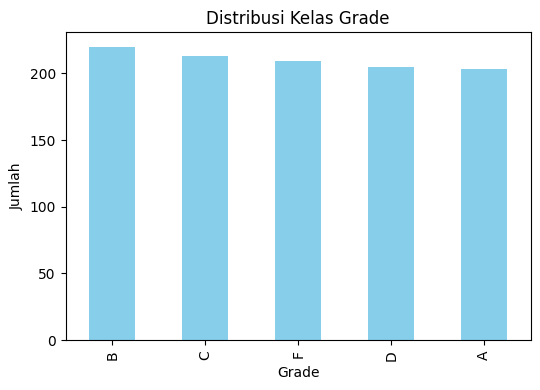

In [ ]:
# --- EDA ---
train_path = "train_data.csv"
test_path = "test_data.csv"
submission_path = "submission.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Menampilkan distribusi nilai Grade
plt.figure(figsize=(6, 4))
train_data['Grade'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribusi Kelas Grade")
plt.xlabel("Grade")
plt.ylabel("Jumlah")
plt.show()

#### Preprocessing

In [61]:
from sklearn.preprocessing import LabelEncoder

# Menghapus kolom yang tersedia dalam dataset
irrelevant_columns = ["First_Name", "Last_Name", "Email", "Student_ID"]
train_data.drop(columns=[col for col in irrelevant_columns if col in train_data.columns], inplace=True)
test_data.drop(columns=[col for col in irrelevant_columns if col in test_data.columns], inplace=True)

# Pastikan Grade tidak ada di test data
if "Grade" in test_data.columns:
    test_data.drop(columns=["Grade"], inplace=True)

# Mengisi nilai NaN untuk kolom numerik
num_cols = train_data.select_dtypes(include=['number']).columns.tolist()
num_cols = [col for col in num_cols if col != "Grade"]
train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].mean())
test_data[num_cols] = test_data[num_cols].fillna(test_data[num_cols].mean())

# Mengisi nilai NaN untuk kolom kategorikal dengan mode
cat_cols = train_data.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    if col in train_data.columns:
        train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    if col in test_data.columns:
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Pastikan hanya kolom kategorikal yang masih ada dalam dataset yang dienkode
categorical_columns = ["Gender", "Department", "Extracurricular_Activities", "Internet_Access_at_Home", "Parent_Education_Level", "Family_Income_Level"]
available_categorical_train = [col for col in categorical_columns if col in train_data.columns]
available_categorical_test = [col for col in categorical_columns if col in test_data.columns]

train_data = pd.get_dummies(train_data, columns=available_categorical_train, drop_first=True)
test_data = pd.get_dummies(test_data, columns=available_categorical_test, drop_first=True)

missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0

extra_cols = set(test_data.columns) - set(train_data.columns)
test_data.drop(columns=extra_cols, inplace=True, errors='ignore')

test_data = test_data[train_data.columns.drop("Grade", errors='ignore')]

label_encoder = LabelEncoder()
train_data["Grade"] = label_encoder.fit_transform(train_data["Grade"].astype(str))

#### Modeling

In [60]:
from sklearn.metrics import classification_report

X = train_data.drop(columns=["Grade"])
y = train_data["Grade"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)
print("Akurasi:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_.astype(str)))
test_predictions = rf_model.predict(test_data)
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

submission = pd.DataFrame({
    "Student_ID": pd.read_csv(test_path)["Student_ID"],
    "Grade": test_predictions_labels
})

submission_path = "submission.csv"
submission.to_csv(submission_path, index=False)
print("Submission file saved to:", submission_path)

Akurasi: 0.2523809523809524
              precision    recall  f1-score   support

           A       0.33      0.31      0.32        32
           B       0.27      0.19      0.23        47
           C       0.24      0.25      0.24        44
           D       0.33      0.36      0.34        47
           F       0.12      0.15      0.13        40

    accuracy                           0.25       210
   macro avg       0.26      0.25      0.25       210
weighted avg       0.26      0.25      0.25       210

Submission file saved to: submission.csv
